In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
customers=pd.read_csv('dataset/olist_customers_dataset.csv')
geolocation=pd.read_csv('dataset/olist_geolocation_dataset.csv')
items=pd.read_csv('dataset/olist_order_items_dataset.csv')
payments=pd.read_csv('dataset/olist_order_payments_dataset.csv')
reviews=pd.read_csv('dataset/olist_order_reviews_dataset.csv')
orders=pd.read_csv('dataset/olist_orders_dataset.csv')
products=pd.read_csv('dataset/olist_products_dataset.csv')
sellers=pd.read_csv('dataset/olist_sellers_dataset.csv')
category=pd.read_csv('dataset/product_category_name_translation.csv')

In [4]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


/Users/xinchunli/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


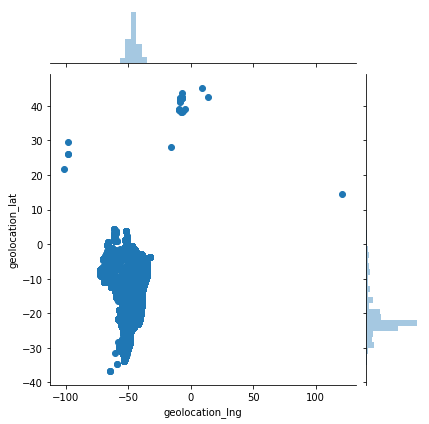

In [24]:
sns.jointplot(geolocation['geolocation_lng'], geolocation['geolocation_lat'], kind='scatter')

In [27]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [39]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [40]:
orders_full=pd.merge(items, payments, on = 'order_id', how='outer')
orders_full=pd.merge(orders_full, reviews, on='order_id', how='outer')
orders_full=pd.merge(orders_full, orders, on = 'order_id', how='outer')

In [42]:
orders_full.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [43]:
orders_full.isnull().sum()

order_id                              0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                             0
review_score                          0
review_comment_title             104962
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
dtype: int64

In [57]:
seller_reviews=orders_full[['seller_id', 'review_score']]
seller_reviews=seller_reviews.dropna()
seller_reviews=seller_reviews.groupby('seller_id')['review_score'].median().to_frame()
seller_reviews=seller_reviews.reset_index('seller_id')
seller_reviews=seller_reviews.sort_values(by='review_score', ascending = False)
seller_reviews.head()

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,5.0
2541,d1b9d4be4b6f9ebd85f8acd6745ba612,5.0
1400,71dc18fd8cbf5fd77f45dd8b427abb34,5.0
1399,718539d38d07dd351c76db862760e2e2,5.0
1398,717b78b0950b51ed00b1471d858b0edc,5.0


In [74]:
seller_reviews.review_score.value_counts().values

array([1854,  544,  223,  165,  160,   70,   42,   30,    7])

Text(0, 0.5, 'Frequency')

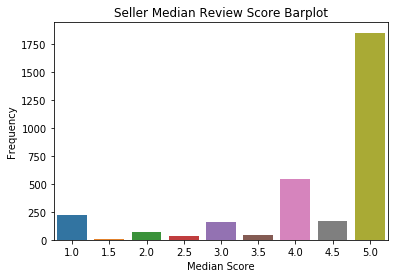

In [79]:
import seaborn as sns
ax=sns.barplot(x=list(seller_reviews.review_score.value_counts().index), 
               y=seller_reviews.review_score.value_counts().values)
ax.set_title("Seller Median Review Score Barplot") 
ax.set_xlabel('Median Score')
ax.set_ylabel('Frequency')

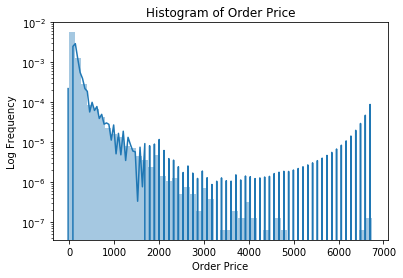

In [83]:
ax=sns.distplot(orders_full.price.dropna())
ax.set_title("Histogram of Order Price") 
ax.set_xlabel('Order Price')
ax.set_ylabel('Log Frequency')
ax.set_yscale("log")

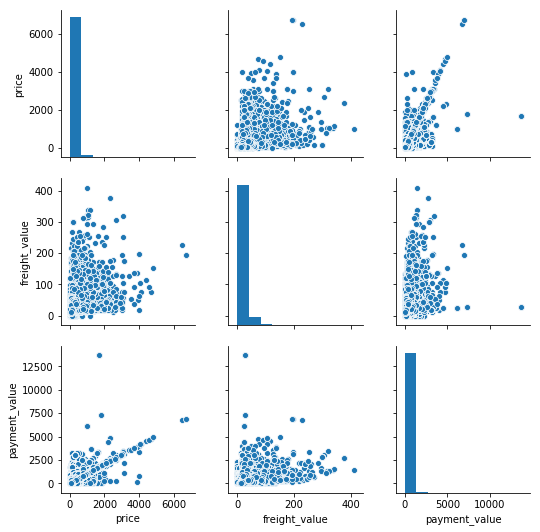

In [86]:
orders_payment=orders_full[['price', 'freight_value', 'payment_value']].dropna()
sns.pairplot(orders_payment)

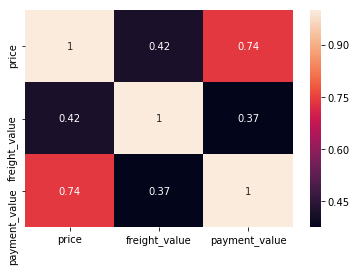

In [87]:
sns.heatmap(orders_payment.corr(),annot=True)

In [89]:
customer_reviews=orders_full[['customer_id', 'review_score']]
customer_reviews=customer_reviews.dropna()
customer_reviews=customer_reviews.groupby('customer_id')['review_score'].median().to_frame()
customer_reviews=customer_reviews.reset_index('customer_id')
customer_reviews=customer_reviews.sort_values(by='review_score', ascending = False)
customer_reviews.head()

,customer_id,review_score
99440,ffffe8b65bbe3087b653a978c870db99,5.0
47958,7bd425c3c361c9e83b81f32dcd2f34eb,5.0
48003,7be913d53481da4195609f9dc1ea373d,5.0
48004,7bea077aae57157afa56bacc3852f1f7,5.0
48006,7bea2f07ef082a136c0fd7d455c8e142,5.0


In [90]:
customer_reviews.review_score.value_counts()

5.0    57045
4.0    19073
1.0    11748
3.0     8242
2.0     3207
4.5       55
2.5       37
3.5       26
1.5        8
Name: review_score, dtype: int64

In [92]:
orders_full.review_score.value_counts()

5    66450
4    22386
1    16016
3    10019
2     4280
Name: review_score, dtype: int64

In [96]:
low_review_products=orders_full[orders_full.review_score==1]['product_id']